<a href="https://colab.research.google.com/github/pmecwan/MAT-421/blob/main/Module_H_Section_22_4_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22.4 Numerical Error and Instability

Accuracy and stability are two fundamental considerations when evaluating integration schemes for ordinary differential equations (ODEs). Accuracy refers to a scheme’s ability to closely approximate the exact solution as a function of the step size, h, determining how precise the results are relative to the true values. Stability, on the other hand, describes a scheme’s capacity to prevent error growth as integration progresses over time; a scheme is considered stable if the error remains bounded and does not increase, but it is unstable if the error grows, whether consistently or intermittently.

initial state of the pendulum is at top of swing with no velocity
 [[1]
 [0]]
linear transform of euler:
 [[ 1.   0.1]
 [-1.6  1. ]]
linear transform of euler implicit:
 [[ 0.86206897  0.0862069 ]
 [-1.37931034  0.86206897]]
linear transform of trapeziodal:
 [[ 0.92307692  0.09615385]
 [-1.53846154  0.92307692]]


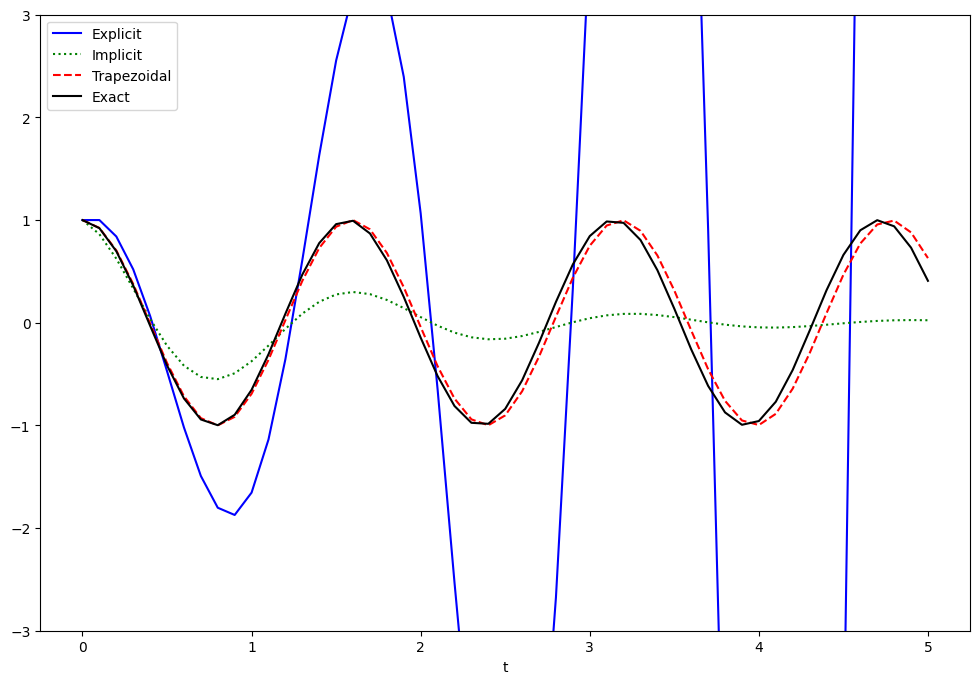

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv


h = 0.1
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])
print('initial state of the pendulum is at top of swing with no velocity\n',s0)

m_euler = np.array([[1, h],
               [-w**2*h, 1]])
print('linear transform of euler:\n',m_euler)

m_eulerimplicit = inv(np.array([[1, -h],
               [w**2*h, 1]]))
print('linear transform of euler implicit:\n',m_eulerimplicit)

m_trapeziodal = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))
print('linear transform of trapeziodal:\n',m_trapeziodal)

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_euler,s_e[j, :])
    s_i[j+1, :] = np.dot(m_eulerimplicit,s_i[j, :])
    s_t[j+1, :] = np.dot(m_trapeziodal,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

initial state of the pendulum is at top of swing with no velocity
 [[1]
 [0]]
linear transform of euler:
 [[  1.     0.05]
 [-31.25   1.  ]]
linear transform of euler implicit:
 [[  0.3902439    0.0195122 ]
 [-12.19512195   0.3902439 ]]
linear transform of trapeziodal:
 [[  0.43820225   0.03595506]
 [-22.47191011   0.43820225]]


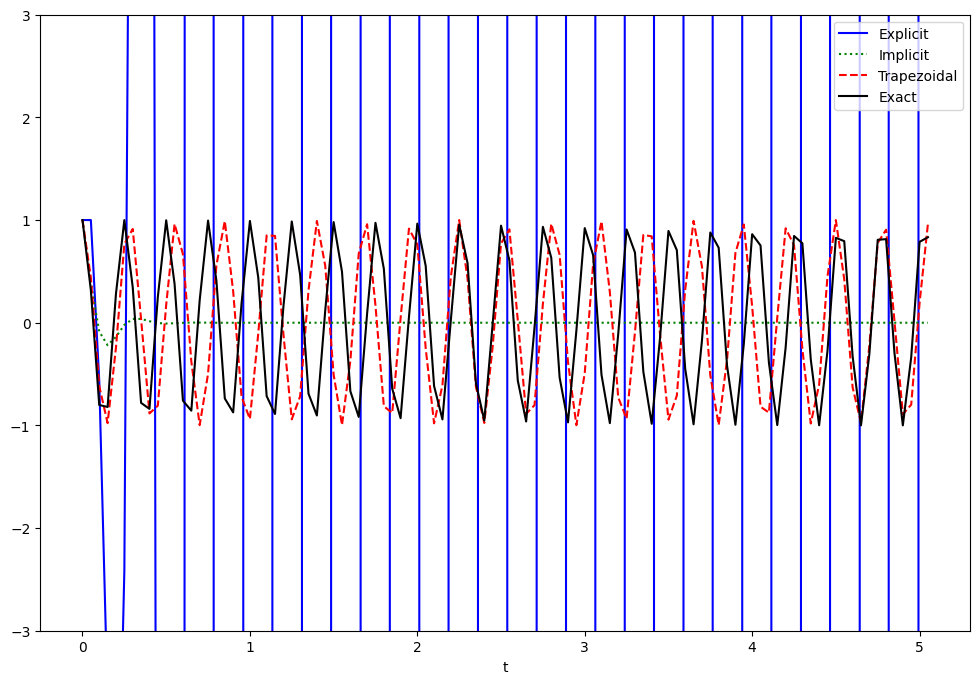

In [ ]:
h = 0.05
t = np.arange(0, 5.1, h)
w = 25
s0 = np.array([[1], [0]])
print('initial state of the pendulum is at top of swing with no velocity\n',s0)

m_euler = np.array([[1, h],
               [-w**2*h, 1]])
print('linear transform of euler:\n',m_euler)

m_eulerimplicit = inv(np.array([[1, -h],
               [w**2*h, 1]]))
print('linear transform of euler implicit:\n',m_eulerimplicit)

m_trapeziodal = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))
print('linear transform of trapeziodal:\n',m_trapeziodal)

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_euler,s_e[j, :])
    s_i[j+1, :] = np.dot(m_eulerimplicit,s_i[j, :])
    s_t[j+1, :] = np.dot(m_trapeziodal,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

22.5 Predictor-Corrector Methods

Predictor-Corrector and Runge-Kutta (RK) methods are two approaches to solving ordinary differential equations (ODEs) with a focus on improving accuracy. The Predictor-Corrector method enhances approximation accuracy by querying the function F multiple times at different points, using an explicit predictor formula to estimate the solution at the next step (tj+1), followed by a corrector step that refines this estimate through a weighted average of the results. In contrast, the Runge-Kutta method, a widely used technique, relies on a truncated Taylor series to approximate the exact solution more closely without requiring iterative state updates; available in various orders, RK methods typically outperform simpler approaches like Euler explicit or implicit methods in terms of accuracy.

22.6 Python ODE Solvers

Python has built in ODE Solvers. The scipy.integrate module is the cornerstone for ODE solving in Python, offering two primary functions for numerical integration of initial value problems (IVPs): odeint and solve_ivp. These tools are built on well-established Fortran libraries like ODEPACK, wrapped in Python for ease of use.

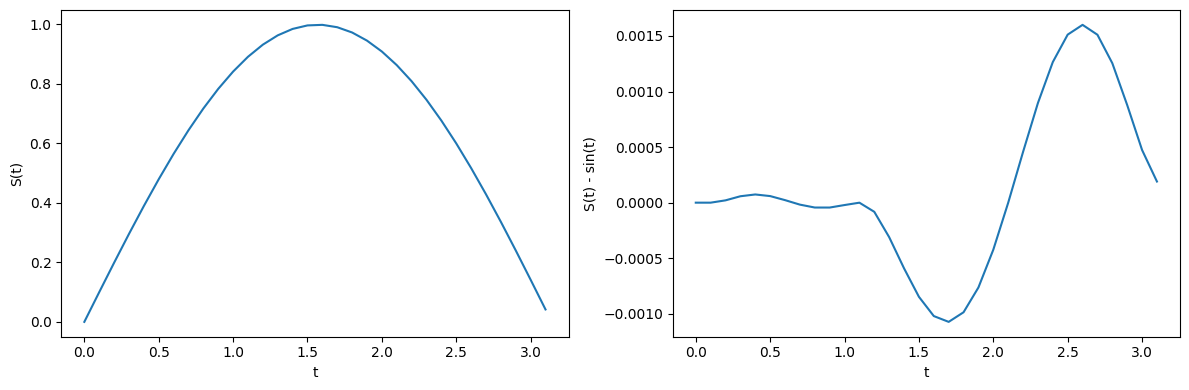

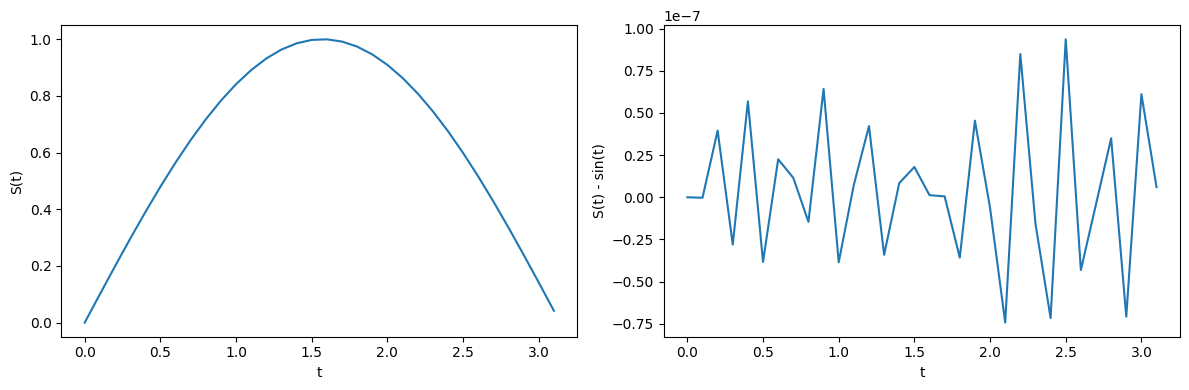

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline
F = lambda t, s: np.cos(t)
t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
rtol = 1e-8, atol = 1e-8)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Python offers several integrated tools for solving ordinary differential equations (ODEs) through its scientific computing libraries, primarily SciPy. These solvers are widely used for numerical integration of ODE systems, providing robust and efficient solutions for a variety of problems in science and engineering. Below is an overview of the key ODE solvers integrated into Python via the SciPy library, focusing on their functionality and usage.

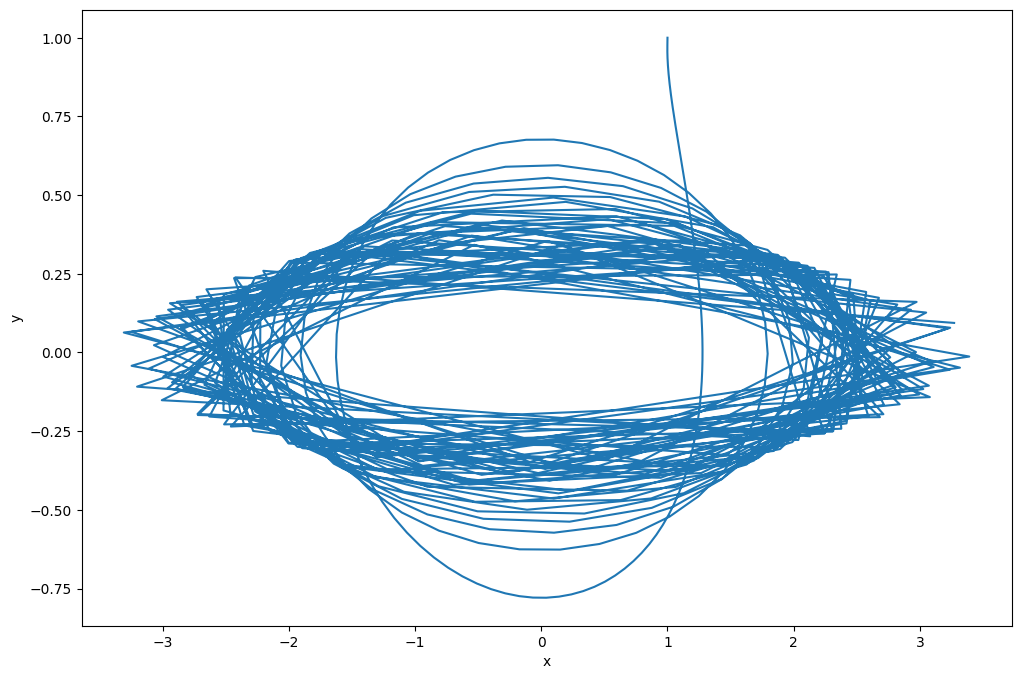

In [ ]:
F = lambda t, s: np.dot(np.array([[0, t**3], [-t, 0]]), s)

t_eval = np.arange(0, 10.02, 0.02)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()